### Data Science Capstone Project NanoDegree 


In [1]:
#Standard Imports  
import pandas as pd 
import numpy as np 

#Data Visualisation Imports 
import matplotlib.pyplot as plt
import seaborn as sns 

#### Load in the dataset 

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('train.csv')

In [3]:
print(train_df.shape,test_df.shape)

(381109, 12) (381109, 12)


In [4]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


Combine Train and Test Data for visualisations 

In [6]:
train_df['type'] = 'train'
test_df['type'] = 'test'

combined_df = pd.concat([train_df, test_df])

In [7]:
combined_df.describe().T.style.background_gradient(
    subset=['std'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
id,762218.000000,190555.000000,110016.764039,1.000000,95278.000000,190555.000000,285832.000000,381109.000000
Age,762218.000000,38.822584,15.511601,20.000000,25.000000,36.000000,49.000000,85.000000
Driving_License,762218.000000,0.997869,0.046110,0.000000,1.000000,1.000000,1.000000,1.000000
Region_Code,762218.000000,26.388807,13.229879,0.000000,15.000000,28.000000,35.000000,52.000000
Previously_Insured,762218.000000,0.458210,0.498251,0.000000,0.000000,0.000000,1.000000,1.000000
Annual_Premium,762218.000000,30564.389581,17213.143765,2630.000000,24405.000000,31669.000000,39400.000000,540165.000000
Policy_Sales_Channel,762218.000000,112.034295,54.203959,1.000000,29.000000,133.000000,152.000000,163.000000
Vintage,762218.000000,154.347397,83.671249,10.000000,82.000000,154.000000,227.000000,299.000000
Response,762218.000000,0.122563,0.327936,0.000000,0.000000,0.000000,0.000000,1.000000


Drop ID column as it does not add any useful information 

In [8]:
#combined_df.drop('id',axis=1,inplace=True)
#train_df.drop('id',axis=1,inplace=True)
#test_df.drop('id',axis=1,inplace=True)

Convert cateforic columns to the correct datatype

In [9]:
combined_df[["Region_Code","Policy_Sales_Channel"]] = combined_df[["Region_Code","Policy_Sales_Channel"]].astype('int').astype("object")
train_df[["Region_Code","Policy_Sales_Channel"]] = train_df[["Region_Code","Policy_Sales_Channel"]].astype('int').astype("object")
test_df[["Region_Code","Policy_Sales_Channel"]] = test_df[["Region_Code","Policy_Sales_Channel"]].astype('int').astype("object")

#### Data quality checks 

In [10]:
train_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
type                    0
dtype: int64

In [11]:
train_df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
type                         1
dtype: int64

In [12]:
train_df.duplicated().value_counts()

False    381109
dtype: int64

In [13]:
test_df.duplicated().value_counts()

False    381109
dtype: int64

No nulls - no duplicates 

#### Target Variable 

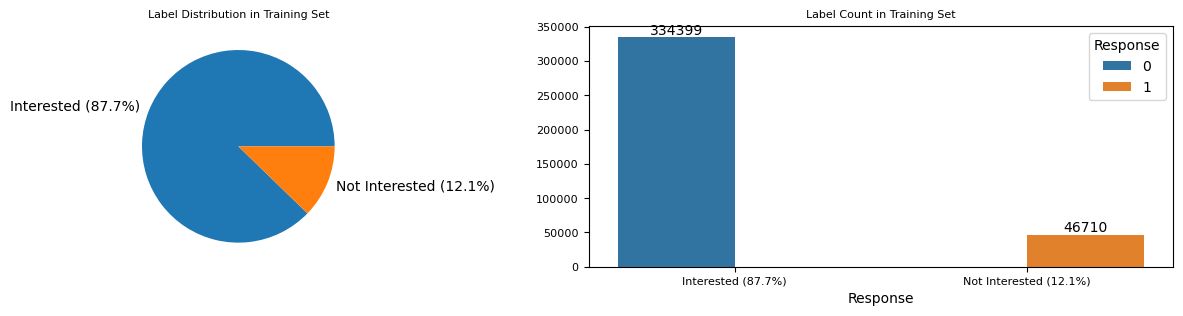

In [14]:
fig, axes = plt.subplots(ncols = 2, figsize = (13, 3), dpi = 100)
plt.tight_layout()

train_df.groupby('Response').count()['id'].plot(kind = 'pie', ax = axes[0], labels = ['Interested (87.7%)', 'Not Interested (12.1%)'])
res = sns.countplot(x = train_df['Response'], hue = train_df['Response'], ax = axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Interested (87.7%)', 'Not Interested (12.1%)'])
axes[0].tick_params(axis = 'x', labelsize = 8)
axes[0].tick_params(axis = 'y', labelsize = 8)
axes[1].tick_params(axis = 'x', labelsize = 8)
axes[1].tick_params(axis = 'y', labelsize = 8)

for container in res.containers:
    res.bar_label(container)

axes[0].set_title('Label Distribution in Training Set', fontsize = 8)
axes[1].set_title('Label Count in Training Set', fontsize =8)

plt.show()

Comment : 
We can observe that the target feature i.e whether a health insuance holder would be a vehicle insurance, is highly imbalanced, with 87% of health insurance holders not having purchased a vehicle insurance.

In [15]:
categorical_columns=[['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']]

#### Analyse the numeric features in the dataset 

In [16]:
numerical_cols = ['Age','Annual_Premium','Vintage']

In [17]:
combined_df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,762218.0,38.822584,15.511601,20.0,25.0,36.0,49.0,85.0
Annual_Premium,762218.0,30564.389581,17213.143765,2630.0,24405.0,31669.0,39400.0,540165.0
Vintage,762218.0,154.347397,83.671249,10.0,82.0,154.0,227.0,299.0


In [18]:
combined_df[numerical_cols].skew(axis=0).to_frame('Skewed Values')

,Skewed Values
Age,0.672538
Annual_Premium,1.766084
Vintage,0.003030


##### Feature : Age 

c:\dev\.conda\envs\jupyter-lab\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Age')

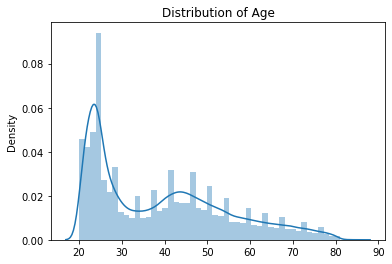

In [19]:
sns.distplot(x= combined_df.Age)
plt.title('Distribution of Age' )

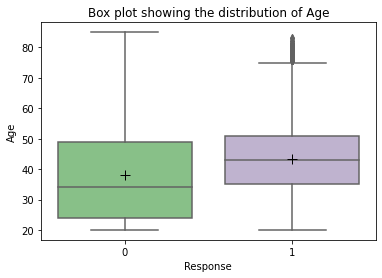

In [20]:
sns.boxplot(x=combined_df['Response'],
        y = combined_df['Age'], 
        data = combined_df,palette='Accent',
            showmeans=True,
                    meanprops={"marker": "+",
                        "markeredgecolor": "black",
                        "markersize": "10"})

plt.title('Box plot showing the distribution of Age' )
plt.show()


In [21]:
combined_df.groupby('Response')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Response,,,,,,,,
0,668798.0,38.178227,15.816040,20.0,24.0,34.0,49.0,85.0
1,93420.0,43.435560,12.168859,20.0,35.0,43.0,51.0,83.0


In [22]:
combined_df.groupby('Response')['Age'].median()

Response
0    34.0
1    43.0
Name: Age, dtype: float64

Comment : 
- Most insurance holders are between 20-30. 
- The dist plot shows a slight bi-modal distribution - A larger number of holders found in the 40-50 years age bracket. 
- The mean and median age is higher for owners interested in vehicle insurance. 
   - Response variable 1 : { Mean : 43 , Median : 43 } , 0 : { Mean : 38 , Median : 43 } 

c:\dev\.conda\envs\jupyter-lab\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\dev\.conda\envs\jupyter-lab\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


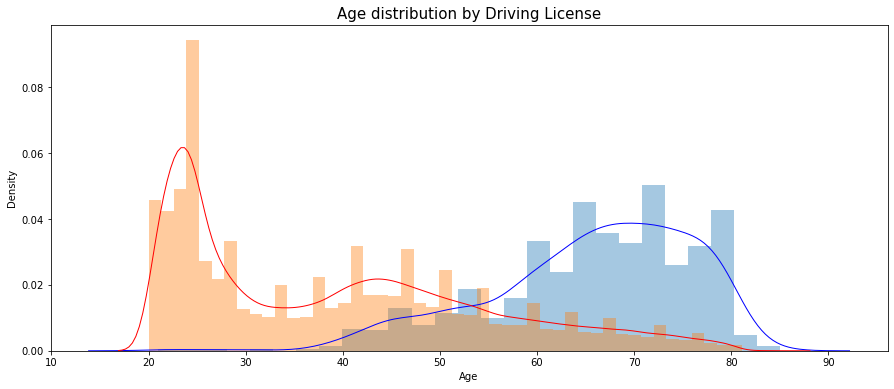

In [23]:
plt.figure(figsize = (15, 6))
sns.distplot(combined_df.loc[(combined_df['Driving_License'] == 0), 'Age'], kde_kws = {"color": "b", "lw": 1, "label": "Not Licensed for driving"})
sns.distplot(combined_df.loc[(combined_df['Driving_License'] == 1), 'Age'], kde_kws = {"color": "r", "lw": 1, "label": "Licensed for Driving"})
plt.title('Age distribution by Driving License', fontsize = 15)
plt.show()

<Figure size 576x432 with 0 Axes>

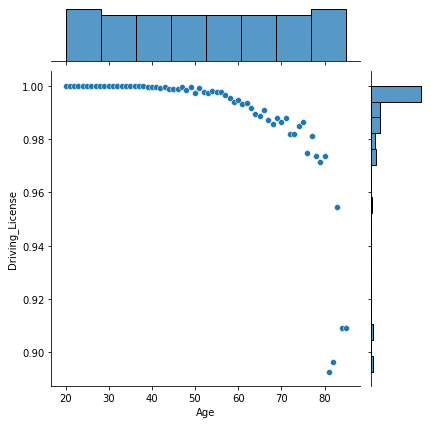

In [24]:
# Plotting jointplot of Age Vs driving license
plt.figure(figsize=(8,6))
sns.jointplot(x='Age', y='Driving_License', data=((combined_df[combined_df['Driving_License']==1]).groupby('Age')['Driving_License'].sum() / combined_df.groupby('Age')['Driving_License'].count()).reset_index());

<Figure size 576x432 with 0 Axes>

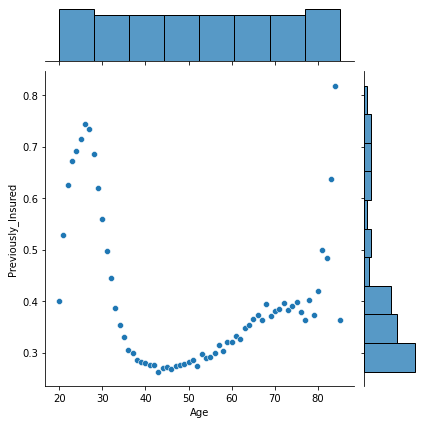

In [25]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Age', y='Previously_Insured', data=((combined_df[combined_df['Previously_Insured']==1]).groupby('Age')['Previously_Insured'].sum() / combined_df.groupby('Age')['Previously_Insured'].count()).reset_index());

##### Feature : Annual Premium 

<AxesSubplot:xlabel='Age', ylabel='Annual_Premium'>

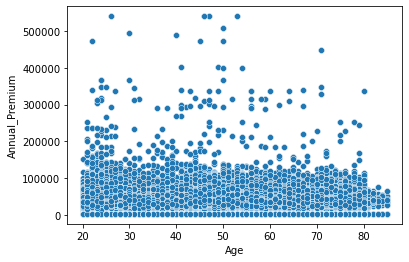

In [26]:
sns.scatterplot(x=combined_df['Age'],y=combined_df['Annual_Premium'])

c:\dev\.conda\envs\jupyter-lab\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


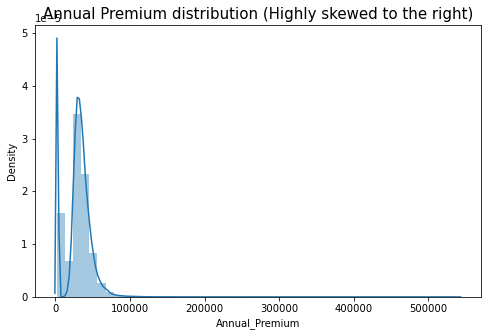

In [27]:
plt.figure(figsize = (8, 5))
sns.distplot(combined_df['Annual_Premium'])
plt.title('Annual Premium distribution (Highly skewed to the right)', fontsize = 15)
plt.show()

c:\dev\.conda\envs\jupyter-lab\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


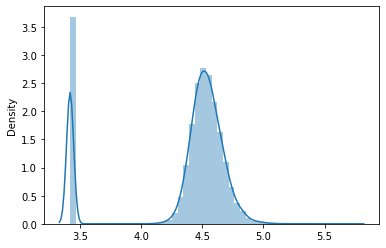

In [28]:
sns.distplot(x=np.log10(combined_df['Annual_Premium']));

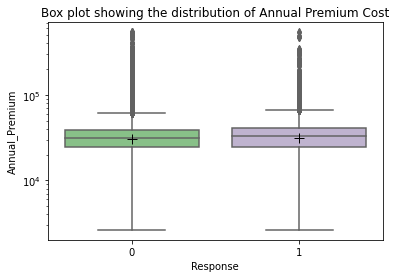

In [29]:
sns.boxplot(x=combined_df['Response'],
        y = combined_df['Annual_Premium'], 
        data = combined_df,palette='Accent',
            showmeans=True,
                    meanprops={"marker": "+",
                        "markeredgecolor": "black",
                        "markersize": "10"})

plt.title('Box plot showing the distribution of Annual Premium Cost' )
plt.semilogy()
plt.show()

In [30]:
combined_df.Annual_Premium.median()

31669.0

In [31]:
combined_df.Annual_Premium.max() - combined_df.Annual_Premium.min()

537535.0

In [32]:
combined_df.groupby('Response')['Annual_Premium'].describe()

,count,mean,std,min,25%,50%,75%,max
Response,,,,,,,,
0,668798.0,30419.160276,16998.280489,2630.0,24351.0,31504.0,39120.0,540165.0
1,93420.0,31604.092742,18646.408239,2630.0,24868.0,33002.0,41297.0,540165.0


In [33]:
combined_df.groupby('Response')['Annual_Premium'].median()

Response
0    31504.0
1    33002.0
Name: Annual_Premium, dtype: float64

Comment : 
- Annual Premium is highly positively skewed to the right. With a skew value of 1.7. 
- There is a large range in Annual Premium of 537535.0
- The mean median price Insurance holders pay per annum is 31669.0
- Mean and Median Values are slighly high where the response variable = 1 
- The box plots show there are a large number of outliers for the annual premium and age where the response variable is positive. 

##### Feature : Vintage

c:\dev\.conda\envs\jupyter-lab\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Vintage')

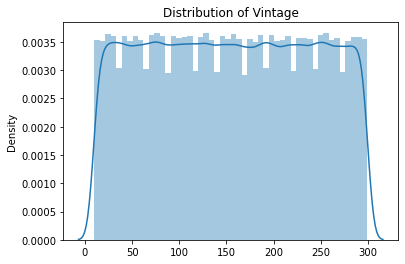

In [34]:
sns.distplot(x= combined_df.Vintage)
plt.title('Distribution of Vintage' )

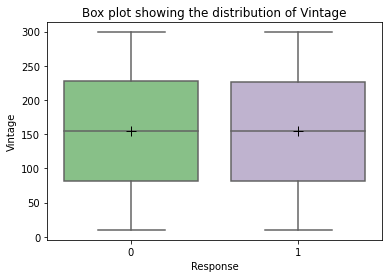

In [35]:
sns.boxplot(x=combined_df['Response'],
        y = combined_df['Vintage'], 
        data = combined_df,palette='Accent',
            showmeans=True,
                    meanprops={"marker": "+",
                        "markeredgecolor": "black",
                        "markersize": "10"})

plt.title('Box plot showing the distribution of Vintage' )
plt.show()

In [36]:
combined_df.index.is_unique

False

In [1]:
df.index.duplicated()

NameError: name 'df' is not defined

In [ ]:
pp_plot_data = test_df.drop(['id','Gender', 'Vehicle_Damage', 'Vehicle_Age', 'Driving_License', 'Region_Code','Policy_Sales_Channel','Previously_Insured' ], axis =1)
sns.pairplot(pp_plot_data, hue="Response");


In [ ]:
numeric_df = combined_df[['Age' ,'Annual_Premium','Vintage']]

In [ ]:
sns.heatmap(numeric_df.corr(),annot=True)
plt.title("Correlation Heatmap",size=15)
plt.show()

In [ ]:
sns.scatterplot(combined_df.Age,combined_df.Annual_Premium,hue=combined_df.Response)

In [ ]:
sns.scatterplot(x=combined_df.Annual_Premium,y= combined_df.Vintage,hue=combined_df.Response)

Comment : 
Based on the correlation heatmap, we can observe that none of the pairs of numerical features have a considerable relationship with each other.
Based on the scatterplots, on analyzing the relationship between two numerical features and also understanding how they help to seperate the target classes, we can conclude that the target classes cannot be seperated by the interaction of two numerical features.

#### Categorical Variables 

In [ ]:
from dython.nominal import associations , identify_nominal_columns , cramers_v , theils_u

In [ ]:
categorical_columns=train_df[['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']]

In [ ]:
col = categorical_columns.columns
cramersV = pd.DataFrame(index=['Response'],columns=categorical_columns.columns)
for i in range(len(col)): 
    v = cramers_v(categorical_columns['Response'], categorical_columns[col[i]], bias_correction=True, nan_strategy='replace', nan_replace_value=0.0)
    cramersV.loc[:,col[i]] = v
    cramersV.astype(float)
plt.figure(figsize=(40,1))
sns.heatmap(cramersV,annot=True,fmt='.3f')

In [ ]:
for i in col: 
    fig = sns.countplot(x=categorical_columns[i] , hue = categorical_columns['Response'])
    
    for container in fig.containers:
        fig.bar_label(container)
        
    plt.title('Countplot for variable {}'.format(i))
    plt.show()


In [ ]:
train_df.head()

#### Data Pre-processing 

In [ ]:
num_feat = ['Age','Vintage','Annual_Premium']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year','Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [ ]:
combined_df.nunique()

In [ ]:
GenderDict = {
    'Male': 0,
    'Female': 1
}
GenderDict

train_df["Gender"] = train_df["Gender"].astype(str).apply(lambda x: GenderDict.get(x))

VehicleDamageDict ={ 
    'No' : 0 , 
    'Yes' : 1 
} 
VehicleDamageDict

train_df['Vehicle_Damage'] = train_df['Vehicle_Damage'].astype(str).apply(lambda x : VehicleDamageDict.get(x))

train_df.drop('id',axis = 1)
train_df.drop('Vintage', axis = 1)

train_df['Annual_Premium'] = np.log(train_df['Annual_Premium'])

trainData=pd.get_dummies(train_df,drop_first=True)

trainData.head()

XGBoost uses sparse matrixes. It only keeps track of the ones and doesn't allocate memory for the zeros. This is how XGboost deals with missing data and is energy efficent at the same time. 

In [270]:
y.unique()

array([1, 0])

In [271]:
sum(y)/len(y)

0.12256336113815208

In [272]:
X.dtypes

id                          int64
Age                         int64
Driving_License             int64
Region_Code               float64
Previously_Insured          int64
Annual_Premium            float64
Policy_Sales_Channel      float64
Vintage                     int64
Vehicle_Age_lt_1_Year       uint8
Vehicle_Age_gt_2_Years      uint8
Vehicle_Damage_Yes          uint8
dtype: object

Only 12% of people responded. The dataset is unbalanced. Because of this when we split the data we split with stratification to maintain the same % in both the training and test datasets. 

In [48]:
from sklearn.model_selection import train_test_split

In [51]:
sum(y_train)/len(y_train)

0.1225619334501856

In [52]:
sum(y_test)/len(y_test)

0.12256764415709817

To determine the optimal number of trees : I use early stopping. This stops building the algorithm when they no longer improve the model 

In [273]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV

In [274]:
y=trainData['Response'].astype(int)
X=trainData.drop(['Response'], axis = 1)

In [275]:
x_train,x_test,y_train,y_test = train_test_split(X,y, random_state = 0,stratify = y)

In [69]:
clf_xgb.fit(x_train,y_train,verbose = True , early_stopping_rounds = 20, eval_metric = 'aucpr' , eval_set = [(x_test , y_test)])

[0]	validation_0-aucpr:0.32118
[1]	validation_0-aucpr:0.32899
[2]	validation_0-aucpr:0.34111
[3]	validation_0-aucpr:0.34685
[4]	validation_0-aucpr:0.34556
[5]	validation_0-aucpr:0.34730
[6]	validation_0-aucpr:0.35362
[7]	validation_0-aucpr:0.35452
[8]	validation_0-aucpr:0.35561
[9]	validation_0-aucpr:0.35668
[10]	validation_0-aucpr:0.36174
[11]	validation_0-aucpr:0.36254
[12]	validation_0-aucpr:0.36431
[13]	validation_0-aucpr:0.36603
[14]	validation_0-aucpr:0.36632
[15]	validation_0-aucpr:0.36774
[16]	validation_0-aucpr:0.36839
[17]	validation_0-aucpr:0.36842
[18]	validation_0-aucpr:0.36955
[19]	validation_0-aucpr:0.37026
[20]	validation_0-aucpr:0.37025
[21]	validation_0-aucpr:0.37010
[22]	validation_0-aucpr:0.37028
[23]	validation_0-aucpr:0.37006
[24]	validation_0-aucpr:0.37083
[25]	validation_0-aucpr:0.37079
[26]	validation_0-aucpr:0.37103
[27]	validation_0-aucpr:0.37104
[28]	validation_0-aucpr:0.37104
[29]	validation_0-aucpr:0.37251
[30]	validation_0-aucpr:0.37250
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train,eval_metric='mlogloss')

pred_xgb = model_xgb.predict(x_test) 
predictions_xgb = [round(value) for value in pred_xgb]
accuracy_xgb = accuracy_score(y_test, predictions_xgb)
print("Accuracy: %.2f%%" % (accuracy_xgb * 100.0))

Accuracy: 87.71%


In [ ]:
NOTE - Due to heavy imbalance in target classes, we need to give considerable importance to both precision and recall of class 1. Hence throughout the evaluation, we will focus on F1 score

We created 3 types of models - Probability, Tree based and boosting techniques.

In [267]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
#from catboost import CatBoostClassifier
#from scipy.stats import randint
#import pickle
import xgboost as xgb
#import lightgbm as lgb
from sklearn.metrics import accuracy_score
# import packages for hyperparameters tuning
#from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

In [276]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)